In [1]:
import matplotlib
%pylab inline
from scipy import stats
import pandas as pd
import os
import pickle
import sys
import math
import ast
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
rs=42

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#interactive script to make plots for tuning LSTM for twitter data

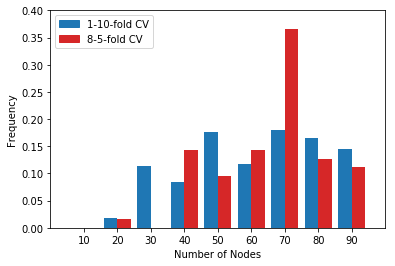

range of chosen param: 20-90
SD in estimated performance: 0.0029311328116975416
SD of chosen param: 19.85493590555124


In [2]:
# plot the distribution of tuned width values across independent runs of J-K-fold CV 
# compare the results from R-10-fold CV and S-5-fold CV
def repeatedchoicesplotter(R,S):
    #input R: number of repetitions for 10-fold CV
    #input S: number of repetitions for 5-fold CV
    random.seed(rs)
    values=[]
    #collect data
    with open("LSTM_differentpartitions_283_10_folds.txt") as f:
        results=f.readlines()
    with open("LSTM_differentpartitions_514_5_folds.txt") as f:
        results2=f.readlines()
    results = [x.strip() for x in results] 
    results2 = [x.strip() for x in results2] 
    for i in range(0,len(results)):
        results[i]=ast.literal_eval(results[i][:-4])
    for i in range(0,len(results2)):
        results2[i]=ast.literal_eval(results2[i][:-4])
    param_choices=[10,20,30,40,50,60,70,80,90]
    #calculate parameters chosen by R-10-fold CV
    #group each K-fold CV tuning into groups of R to have R-10-fold CV
    for i in range(0,math.floor(len(results)/R)-1):
        means=list(results[i*R])
        #average across R K-fold CV grid searches
        for j in range(1,R):
            new=results[R*i+j]
            #for each param choice
            for k in range(0,len(results[0])):
                means[k]=means[k]+new[k]
        for k in range(0,len(results[0])):
            means[k]=means[k]/R
        values.append(means)
    repeatedchoices=[]
    indexofchoices=[]
    #choose the maximum element on grid
    for i in range(0,len(values)):
        repeatedchoices.append(param_choices[np.argmax(values[i])])
        indexofchoices.append(np.argmax(values[i]))
    repeatedscores=[]
    for i in range(0,len(values)):
        repeatedscores.append((np.max(values[i])))
        
    #repeate for second choice   
    values2=[]
    #calculate parameters chosen by S-5-fold CV
    #group each K-fold CV tuning into groups of S to have S-5-fold CV
    for i in range(0,math.floor(len(results2)/S)-1):
        means2=list(results2[i*S])
        #average across S K-fold CV grid searches
        for j in range(1,S):
            new=results2[S*i+j]
            #for each param choice
            for k in range(0,len(results2[0])):
                means2[k]=means2[k]+new[k]
        for k in range(0,len(results[0])):
            means2[k]=means2[k]/S
        values2.append(means2)
    repeatedchoices2=[]
    indexofchoices2=[]
    #choose the maximum element on grid
    for i in range(0,len(values2)):
        repeatedchoices2.append(param_choices[np.argmax(values2[i])])
        indexofchoices2.append(np.argmax(values2[i]))
    repeatedscores2=[]
    for i in range(0,len(values2)):
        repeatedscores2.append((np.max(values2[i])))
        
    #make plot
    fig, ax1 = plt.subplots()
    bins=np.arange(11) - 0.5
    weights1 = np.ones_like(repeatedchoices)/float(len(repeatedchoices))
    weights2 = np.ones_like(repeatedchoices2)/float(len(repeatedchoices2))
    ax1.hist([indexofchoices,indexofchoices2],normed=False,weights=[weights1,weights2],bins=bins,color=["tab:blue","tab:red"])
    pyplot.legend(loc='upper right')
    ax1.set_xlabel('Number of Nodes')
    ax1.set_ylabel('Frequency', color='black')
    ax1.tick_params('y', colors='black')
    plt.xticks(range(9))
    ax1.set_xticklabels([x*10 for x in range(1,10)])
    ax1.set_xlim(-1,9)
    ax1.set_ylim(0,0.4)
    red_patch = mpatches.Patch(color='tab:red', label=str(S)+'-5-fold CV')
    blue_patch = mpatches.Patch(color='tab:blue', label=str(R)+'-10-fold CV')
    plt.legend(handles=[blue_patch,red_patch])
    plt.show()
    #find range in chosen params
    print("range of chosen param: "+str(min(repeatedchoices))+"-"+str(max(repeatedchoices)))
    #find variance in estiamted model performance
    print("SD in estimated performance: "+str(np.sqrt(np.var(repeatedscores,ddof=1))))
    #find variance of parameter
    param_var=np.sqrt(np.var(repeatedchoices,ddof=1))
    print("SD of chosen param: "+str(param_var))
 
    return values

REPS=repeatedchoicesplotter(1,8)

SD of chosen bias reg: 0.040444153935470274
SD of chosen input reg: 0.016019642698039453
SD in estimated performance: 0.003652044509493804


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


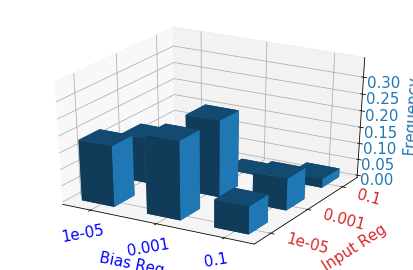

In [7]:
# plot the distribution of tuned regularisation values across independent runs of R-K-fold CV 
def repeatedchoicesplotter(R,K):
    #input R: is nuber of repetitions R (defined as J in paper)
    #input K: is number of folds (either 5,10)
    random.seed(rs)
    values=[]
    if (K==5):
        with open("LSTM_differentpartitions_reg_1200_5_folds.txt") as f:
            results=f.readlines()
    elif (K==10):
        with open("LSTM_differentpartitions_reg_566_10_folds.txt") as f:
            results=f.readlines()
    else:
        print("no precomputed data")
        return
    results = [x.strip() for x in results] 
    for i in range(0,len(results)):
        results[i]=ast.literal_eval(results[i])
    #group each K-fold CV tuning into groups of R to have R-K-fold CV
    for i in range(0,math.floor(len(results)/R)-1):
        means=list(results[i*R])
        #average across R K-fold CV grid searche
        for j in range(1,R):
            new=results[i*R+j]
            #for each param choice
            for k in range(0,len(results[0])):
                means[k]=means[k]+new[k]
        for k in range(0,len(results[0])):
            means[k]=means[k]/R
        values.append(means)
    biasregchoices=[]
    indexofbiasreg=[]
    indexofinputreg=[]
    inputregchoices=[]
    biasreg=[0.00001,0.001,0.1]
    inputreg=[0.00001,0.001,0.1]
    for i in range(0,len(values)):
        #choose the maximum element on grid
        biasregchoices.append(biasreg[math.floor(np.argmax(values[i])/3)])
        inputregchoices.append(inputreg[(np.argmax(values[i]) % 3)])
        indexofbiasreg.append(math.floor(np.argmax(values[i])/3))
        indexofinputreg.append(np.argmax(values[i]) % 3)
    repeatedscores=[]
    for i in range(0,len(values)):
        repeatedscores.append((np.max(values[i])))
        

    #find variance of parameter
    print("SD of chosen bias reg: "+str(np.sqrt(np.var(biasregchoices,ddof=1))))
    print("SD of chosen input reg: "+str(np.sqrt(np.var(inputregchoices,ddof=1))))
    #find variance in estiamted model performance
    print("SD in estimated performance: "+str(np.sqrt(np.var(repeatedscores,ddof=1))))

    
    #plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    hist, xedges, yedges = np.histogram2d( indexofbiasreg,indexofinputreg,bins=[np.arange(4),np.arange(4)],normed=True)
    xpos, ypos = np.meshgrid(xedges[:-1]+0.25, yedges[:-1]+0.25)
    xpos = xpos.flatten('F')
    ypos = ypos.flatten('F')
    zpos = np.zeros_like(xpos)
    dx = 0.5* np.ones_like(zpos)
    dy = dx.copy()
    dz = hist.flatten()
    ax.set_xlabel('Bias Reg',color='blue',labelpad=15)
    ax.set_ylabel('Input Reg',color='tab:red',labelpad=20)
    ax.set_zlabel('Frequency',color='tab:blue',labelpad=8)
    ax.set_zlim(0,0.35)
    from matplotlib import rcParams
    rcParams.update({'figure.autolayout': True})
    ax.tick_params(colors='tab:blue')
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='tab:blue', zsort='average')
    xmarks=[i+0.5 for i in range(0,2+1,1)]
    plt.xticks(xmarks)
    plt.yticks(xmarks)
    ax.set_xticklabels(biasreg,rotation=10,color='blue')    
    ax.set_yticklabels(inputreg,rotation=-15, va='center', ha='left',color='tab:red')
    plt.rcParams.update({'font.size': 15})
    plt.savefig('foo.png')
    plt.show()

REPS=repeatedchoicesplotter(1,10)